In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

# Machine_Learning_Identify_Fraud_from_Enron_Email
by NK Zhehua Zou

# Introduction
Before it falls, Enron was one the biggest corporation in the United States. An energy company created by Kenneth Lay in 1985 after the merging of Houston Natural Gas and InterNorth. This compagny once cited as one of the most innovative one ,declared bankruptcy after the scandal about fraud and conspiracy was revealead in October 2001. The dataset used in this project compiled financial data and email correspondance of person related to the firm.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import files from specific folder
# from tester import two functions will save time creat some function for validation and algorithm
import sys
sys.path.append("script/")
from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

# load for algorithm
import numpy as np
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

In [4]:
# same way with other data.type, pd.read_type() and df.to_type()
data_dict = pd.read_pickle('pkl/final_project_dataset.pkl')

In [5]:
# change it to dataframe from dict
data_df = pd.DataFrame(data_dict)

In [6]:
# run df.head() to check table and then transpose it
data_df = pd.DataFrame.transpose(data_df)

# Summary

In [7]:
# df.shape() check row and col
print 'The number of row and col in this dataset: ' + str(data_df.shape)

The number of row and col in this dataset: (146, 21)


In [8]:
# run again to confirm if data transposed to correct shape
data_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


### Data Exploration
1) The number of POI (persons of interest) and non-POI

In [9]:
# sum(data['variable']) need variable as condition
# len(data) not need condition
is_poi = data_df[data_df['poi']==True]
non_poi = data_df[data_df['poi']==False]
print 'The number of POI is : ' + str(sum(is_poi['poi']))
print 'The number of non-POI is : ' + str(len(non_poi))

The number of POI is : 18
The number of non-POI is : 128


2) Top 5 of missing values in each column

In [10]:
data_df[data_df=='NaN']=None
data_df.isnull().sum().sort_values(ascending=False)[:5]

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
dtype: int64

3) Top 5 of missing values in each row

In [11]:
# df.isnull().sum(axis=1) count missing value in row
# df.isnull().sum(axis=1)[:5] show 5th row of count missing value
data_df.isnull().sum(axis=1).sort_values(ascending=False)[:5]

LOCKHART EUGENE E                20
GRAMM WENDY L                    18
WROBEL BRUCE                     18
WHALEY DAVID A                   18
THE TRAVEL AGENCY IN THE PARK    18
dtype: int64

4) Detail of 'LOCKHART EUGENE E' who missing 20 values

In [12]:
# df.loc['variable', :] chek details with specific location
data_df.loc['LOCKHART EUGENE E']

bonus                         None
deferral_payments             None
deferred_income               None
director_fees                 None
email_address                 None
exercised_stock_options       None
expenses                      None
from_messages                 None
from_poi_to_this_person       None
from_this_person_to_poi       None
loan_advances                 None
long_term_incentive           None
other                         None
poi                          False
restricted_stock              None
restricted_stock_deferred     None
salary                        None
shared_receipt_with_poi       None
to_messages                   None
total_payments                None
total_stock_value             None
Name: LOCKHART EUGENE E, dtype: object

5) Find outlier for specific variable

In [13]:
data_df.loc[:,'bonus'].sort_values(ascending=False)[:5]

TOTAL                 97343619
LAVORATO JOHN J        8000000
LAY KENNETH L          7000000
SKILLING JEFFREY K     5600000
BELDEN TIMOTHY N       5249999
Name: bonus, dtype: object

### Data Wrangling
We delete these data because:  
1) 'TOTAL' is outlier also is not an individual  
2) 'THE TRAVEL AGENCY IN THE PARK' is not a individual  
3) 'LOCKHART EUGENE E' no any information

In [14]:
data_df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E'], inplace=True)

### Data Plotting

In [15]:
# Plotting Data
# for i, _ in enumerate(dataset), need _ because enumerate will return index and value
# plt.subplot() includes the numbers of row, column, index
# plt.subplots_adjust(hspace=0.5) is distance between each row
def plot_univariate(dataset):
    fig = plt.figure(figsize=(20, 40))
    for i, _ in enumerate(dataset):
        try:
            sub = plt.subplot(7,3, i+1)
            plt.xticks(rotation='vertical')
            plt.subplots_adjust(hspace=0.5) 
            sub.hist(dataset.iloc[:,i].dropna())
            sub.set_xlabel(dataset.columns[i])
        except:
            continue

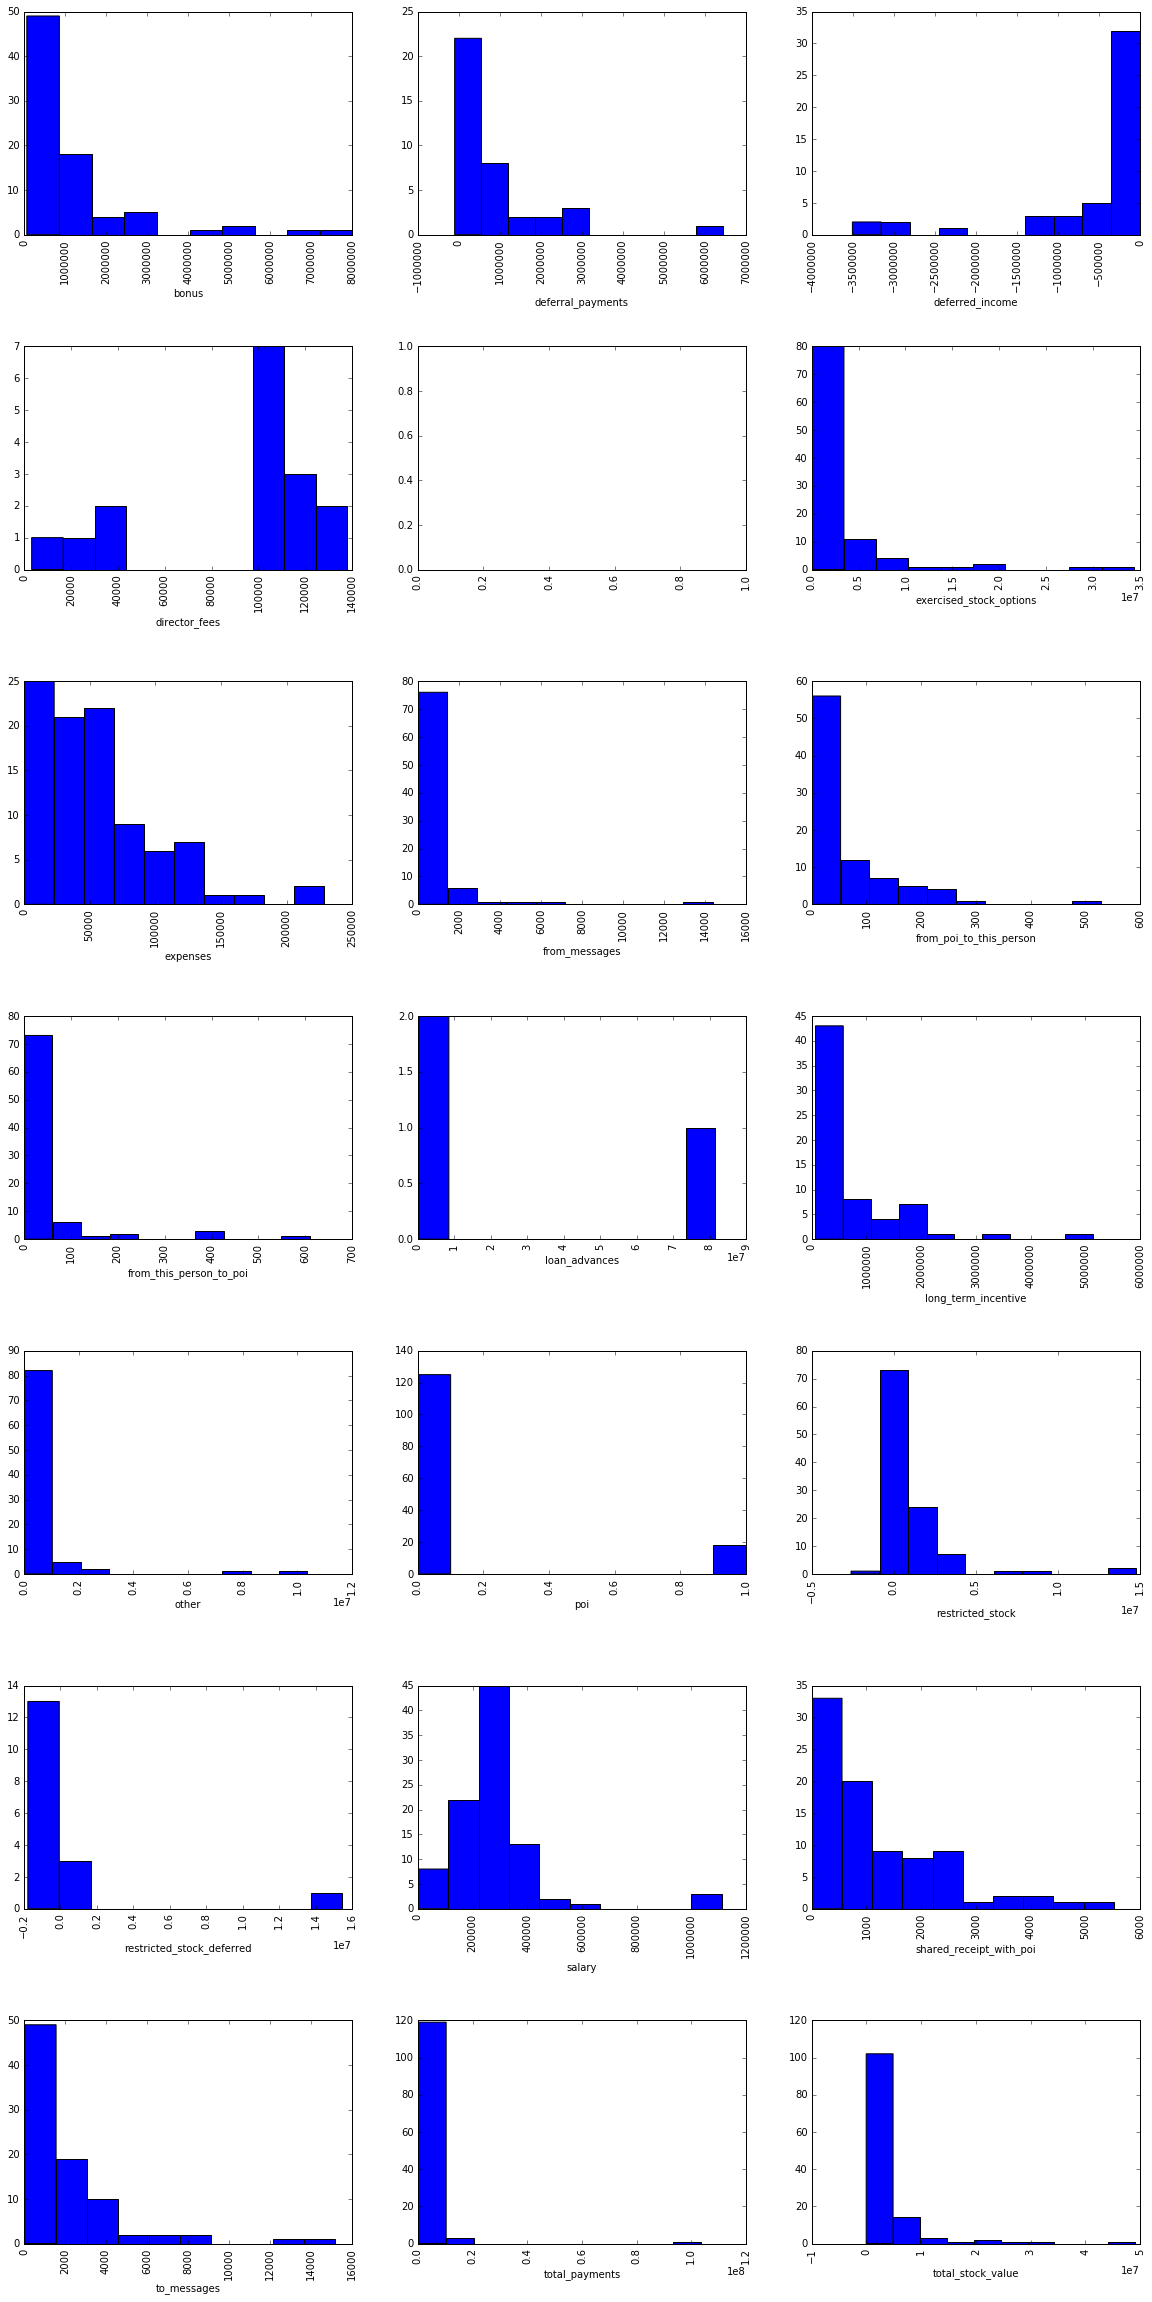

In [16]:
plot_univariate(data_df)

# Algorithm and Validation

### Data wrangling
We need to delete these data ('TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E') again because we use different type of dataset to process next section.

In [17]:
# We use dict because I don't know how to use dataframe in next section
data_dict.pop('TOTAL', None)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', None)
data_dict.pop('LOCKHART EUGENE E', None)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

### Create New Feartures and get best features
1) Two features are created related to the email. "Ratio from poi" and "Ratio to poi" give an indication of the importance of mail send to / receive from poi in proportion of the total email of send / recieve.  
2) Get best features by SelectKbest. I tested best value for K by hand, put 4 to 10 in K each time and caculated F1 with Decision Tree.  
3) See the chart below, we found K=5 will get best result.  
4) Best features are 'poi', 'loan_advances', 'deferred_income', 'expenses', 'ratio_from_poi'.

##### Result from Decision Tree with diffrence K value
| K | 4 | 5 | 6 | 7 | 8 | 9 | 10 |  
|---|---|---|---|---|---|---|---|  
| Accuracy | 0.78 | 0.79 | 0.81 | 0.79 | 0.77 | 0.79 | 0.79 |  
| Precision | 0.37 | 0.37 | 0.35 | 0.33 | 0.27 | 0.27 | 0.29 |  
| Recall | 0.33 | 0.33 | 0.30 | 0.33 | 0.27 | 0.27 | 0.29 |  
| F1 | 0.35 | 0.35 | 0.32 | 0.33 | 0.27 | 0.27 | 0.29 |  

In [18]:
# create new features
def ratio_features(num,den):
    new_feature=[]
    for key in data_dict:
        if data_dict[key][num]!="NaN" or  data_dict[key][den]!="NaN":
            new_feature.append(float(data_dict[key][num])/float(data_dict[key][den]))
        else:
            new_feature.append(0.)
    return new_feature

ratio_from_poi=ratio_features('from_poi_to_this_person','to_messages')
ratio_to_poi=ratio_features('from_this_person_to_poi','from_messages')

for i,key in enumerate(data_dict):
    data_dict[key]["ratio_from_poi"]=ratio_from_poi[i]
    data_dict[key]["ratio_to_poi"]=ratio_to_poi[i]

new_features = ['ratio_from_poi', 'ratio_to_poi']

In [19]:
# create features list
financial_features=['salary', 'deferral_payments', 'total_payments',
 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
 'long_term_incentive', 'restricted_stock', 'director_fees'] 

email_features=['to_messages', 'from_poi_to_this_person', 'from_messages', 
'from_this_person_to_poi', 'shared_receipt_with_poi']

features_list = ['poi'] + financial_features + email_features

features_list += new_features

In [20]:
# get best features
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

selector = SelectKBest(k=5)
selectedFeatures = selector.fit(features,labels)
best_features = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', best_features

Best features:  ['poi', 'loan_advances', 'deferred_income', 'expenses', 'ratio_from_poi']


In [21]:
# update labels and features
np.random.seed(42)

data = featureFormat(data_dict, best_features)
labels, features = targetFeatureSplit(data)

    ## split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
test_classifier(clf, data_dict, best_features)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79342	Precision: 0.36568	Recall: 0.32600	F1: 0.34470	F2: 0.33323
	Total predictions: 12000	True positives:  652	False positives: 1131	False negatives: 1348	True negatives: 8869



### Algorithm
##### 1 - Naives Bayes

In [22]:
t0 = time()
clf = GaussianNB()
test_classifier(clf, data_dict, best_features)
print 'Running time: ', round(time()-t0, 3), 's'

GaussianNB()
	Accuracy: 0.75408	Precision: 0.21304	Recall: 0.17650	F1: 0.19305	F2: 0.18277
	Total predictions: 12000	True positives:  353	False positives: 1304	False negatives: 1647	True negatives: 8696

Running time:  0.698 s


##### 2 - K nearest neighbors

In [23]:
t0 = time()
knn = KNeighborsClassifier()
# feature scale
estimators = [('scale', StandardScaler()), ('knn', knn)]
clf = Pipeline(estimators)
test_classifier(clf, data_dict, best_features)
print 'Running time: ', round(time()-t0, 3), 's'

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])
	Accuracy: 0.83083	Precision: 0.45536	Recall: 0.07650	F1: 0.13099	F2: 0.09177
	Total predictions: 12000	True positives:  153	False positives:  183	False negatives: 1847	True negatives: 9817

Running time:  1.012 s


##### 3.1 - Decision Tree

In [24]:
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
test_classifier(clf, data_dict, best_features)
print 'feature importance'
print clf.feature_importances_
print 'Running time: ', round(time()-t0, 3), 's'

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79217	Precision: 0.36124	Recall: 0.32150	F1: 0.34021	F2: 0.32873
	Total predictions: 12000	True positives:  643	False positives: 1137	False negatives: 1357	True negatives: 8863

feature importance
[ 0.          0.24523774  0.41058496  0.3441773 ]
Running time:  0.515 s


##### 3.2 - Tune Decision Tree

In [25]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,5)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "Best estimator found by grid search:"
print clf.best_estimator_
print 'Running time: ', round(time()-t0, 3), 's'

Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Running time:  0.663 s


##### result
| algorithm | precision | recall |  
|---|---|---|---|---|  
| GaussianNB() | 0.21 | 0.18 |  
| KNeighborsClassifier(knn__algorithm='ball_tree', knn__n_neighbors=1) | 0.46 | 0.08 |  
| tree.DecisionTreeClassifier(splitter='random', criterion='gini') | 0.36 | 0.32 |

### Validate and Evaluate

##### Validate
1) Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.  
2) Validation plays an important role when checking the performance of the data. If the data use to fit the model, is also used to make the prediction.  
3) The model will be unable to predict on new data and overfit if the data use to both of  fit model and prediction.  
4) The simplest way is divide the dataset into training set and testing set, but limit the number of observations use to train the model.  
5) Cross-validation could be used where the dataset is divide in k fold and a subset of the data is used to train, and the the rest is used to predict then repeat the process by changing the subset of data used to train the model.  
6) Because of the small size of the dataset, stratified shuffle split cross validation is used. StratifiedShuffleSplit also keeps the ratio of POI/non-POI the same as it was in the original data set. A classic mistake to make a wrong validation is to split the sorted data without shuffling.  
7) The machine learning algorithms are parameterized so that their behavior can be tuned for a given problem. It's important to perform parameter tuning here to adjust the precision and recall. In order to get the best result in identifying person of interest, I will use grid search to automatically tune the algorithm.  

##### Evaluation metrics
1) Low number of false positive and false negative result to High precision and recall.  
$$ Precision =  \frac{True Positive}{ True Positive + False Positive } $$  
  
$$ Recall    = \frac{True Positive}{True Positive + False Negative } $$  

2) f1_score is the weighted average of precision and recall, with 1 as the highest score and 0 as the worst.  
To define which algorithm is the best suited to answer the problem "f1" was most useful measure of performance.  
$$ f1 =  2 * \frac{ Precision * Recall }{ Precision + Recall } $$  
  
##### Evaluation
1) Avg. Precision: 0.36  
Precision is also referred to as positive predictive value. It's calculated as True Positive/(True Positive + False Positive). In here it means the proportion of the correct prediction of all the people who are predicted to be poi.  
2) Avg. Recall: 0.32  
Recall is also referred to as the true positive rate or sensitivity. It's calculated as True Positive/(True Positive + False Negative). In here it means the proportion of the poi the model can detect of all the poi. For fraud prediction models, higher recall is generally preferred even if some precision is sacrificed.  
  
### Conclusion
1) In this case, I have to preprocess data to remove outliers and invaliable data, and then identify the person of interest.  
2) Decision Tree and K nearest neighbors are not better models in this case, they take long time and result low score of f1 and precision.  
3) I take Naives bayes as the final model because of the performance of the rapidity of execution and result high f1 score (0.43) and high precision score (0.47).  
  
##### References
1) https://github.com/GuillaumeSalvan/P5-Identify-Fraud-from-Enron-Email    
2) https://github.com/yielder/identifying-fraud-from-enron-email  
3) https://github.com/thuyquach/Identify-Fraud-from-Enron-Email  